# 📘 Entrega Final

**Nombre del alumno:** Veronica Vargas

#Hola profe. Le queria avisar que esta entrega final me guie mucho con lo que ud hizo, la ultima parte mas que nada, ya que estuve y estoy a la fecha con los finales de la facultad. Mi intension es que una vez finalizada la epoca de finales enfocarme en este curso y afianzar todo lo que quedo a medias. Fue un gusto tenerla como profesora, sus explicaciones son muy practicas y explicativas, ame que siempre esta el paso a paso de todo. Fun un placer tenerla como docente <3.
##Felices Fiestas!!!

#Etapa1: 1. Crear un documento en Google Colaboratory y cargar los sets de datos como DataFrames.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.listdir("/content/drive/MyDrive/datasets")

['ventas.csv',
 'clientes.csv',
 'marketing.csv',
 'clientes_clean.csv',
 'marketing_clean.csv',
 'ventas_clean.csv']

In [4]:
ruta_ventas = "/content/drive/MyDrive/datasets/ventas.csv"
ruta_clientes = "/content/drive/MyDrive/datasets/clientes.csv"
ruta_marketing = "/content/drive/MyDrive/datasets/marketing.csv"

ventas = pd.read_csv(ruta_ventas)
clientes = pd.read_csv(ruta_clientes)
marketing = pd.read_csv(ruta_marketing)

print("ventas.shape ->", ventas.shape)
print("clientes.shape ->", clientes.shape)
print("marketing.shape ->", marketing.shape)

display(ventas.head(3))
display(clientes.head(3))
display(marketing.head(3))

ventas.shape -> (3035, 6)
clientes.shape -> (567, 5)
marketing.shape -> (90, 6)


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024


#Etapa 1: 4. Introducción a Pandas: realizar un análisis exploratorio inicial de los DataFrames.


**4.1 Exploracion Inicial con Pandas de Ventas**

In [5]:
ventas.info()

print("\nDuplicados", ventas.duplicated().sum())
print("\ndtypes:")
print(ventas.dtypes)
print("\nPrimeras filas:")
display(ventas.head(5))
print("\nUltimas filas:")
display(ventas.tail(5))
print("\nNulos por columna:")
print(ventas.isna().sum())
print("\nEstadísticas descriptivas:")
print(ventas.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB

Duplicados 35

dtypes:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Primeras filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



Ultimas filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
3030,1837,Horno eléctrico,$104.12,9.0,30/12/2024,Electrodomésticos
3031,2276,Laptop,$85.27,9.0,30/12/2024,Electrónica
3032,2696,Laptop,$107.81,4.0,30/12/2024,Electrónica
3033,2913,Smartphone,$99.85,7.0,30/12/2024,Electrónica
3034,2930,Consola de videojuegos,$55.47,6.0,30/12/2024,Electrónica



Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Estadísticas descriptivas:
          id_venta     cantidad
count  3035.000000  3033.000000
mean   1499.851400     6.496538
std     866.465379     3.457250
min       1.000000     1.000000
25%     748.500000     3.000000
50%    1502.000000     7.000000
75%    2249.500000     9.000000
max    3000.000000    12.000000


**Calidad de los datos de Ventas**


*  **Valores nulos:** Se detectan 2 valores nulos en las columnas precio y cantidad
*   **Duplicados:** Se identifican 35 registros duplicados, lo que representa aproximadamente el 1.15% del total.
*   **Tipos de datos:** La columna precio está en formato object, por lo que deberá convertirse a numérico (float) tras eliminar el símbolo de moneda “$”.
*   **Fechas:** La columna fecha_venta se encuentra como object, por lo que conviene transformarla al tipo datetime.



4.2 **Exploracion Inicial con Pandas de Clientes**

In [6]:
clientes.info()

print("\nDuplicados", clientes.duplicated().sum())
print("\ndtypes:")
print(clientes.dtypes)
print("\nPrimeras filas:")
display(clientes.head(5))
print("\nUltimas filas:")
display(clientes.tail(5))
print("\nNulos por columna")
print(clientes.isna().sum())
print("\nEstadísticas descriptivas:")
print(clientes.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB

Duplicados 0

dtypes:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Primeras filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



Ultimas filas:


,id_cliente,nombre,edad,ciudad,ingresos
562,563,Dione Forsyde,29,Posadas,26757.73
563,564,Fleming Gow,39,Santa Fe,43674.96
564,565,Jewelle Mabbett,33,Córdoba,30522.64
565,566,Lauri Munns,23,Resistencia,31259.14
566,567,Micah Matis,31,Corrientes,42927.86



Nulos por columna
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Estadísticas descriptivas:
       id_cliente        edad      ingresos
count  567.000000  567.000000    567.000000
mean   284.000000   37.940035  34668.739012
std    163.823075   10.202885  12974.531446
min      1.000000   20.000000    170.290000
25%    142.500000   30.000000  26015.240000
50%    284.000000   37.000000  35066.830000
75%    425.500000   43.000000  42457.100000
max    567.000000   81.000000  88053.010000


**Calidad de los datos de Clientes**

*  **Valores nulos:** No se registran valores nulos en ninguna columna.
*  **Duplicados:** No se detectaron registros duplicados.
*  **Tipos de datos:** Los tipos son coherentes con cada campo (numéricos y categóricos)

4.3 **Exploracion Inicial con Pandas de Marketing**

In [7]:
marketing.info()

print("\nDuplicados", marketing.duplicated().sum())
print("\ndtypes:")
print(marketing.dtypes)
print("\nPrimeras filas:")
display(marketing.head(5))
print("\nUltimas filas:")
display(marketing.tail(5))
print("\nNulos por columna:")
print(marketing.isna().sum())
print("\nEstadísticas descriptivas:")
print(marketing.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB

Duplicados 0

dtypes:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Primeras filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024



Ultimas filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
85,70,Aspiradora,TV,3.06,13/12/2024,29/12/2024
86,89,Televisor,TV,4.98,13/12/2024,8/2/2025
87,68,Rincón de plantas,TV,5.81,17/12/2024,14/2/2025
88,33,Secadora,Email,3.80,20/12/2024,7/1/2025
89,11,Freidora eléctrica,RRSS,5.27,29/12/2024,21/1/2025



Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Estadísticas descriptivas:
       id_campanha      costo
count    90.000000  90.000000
mean     45.500000   4.928667
std      26.124701   0.947750
min       1.000000   2.950000
25%      23.250000   4.372500
50%      45.500000   4.900000
75%      67.750000   5.562500
max      90.000000   7.390000


**Calidad de los datos de Marketing**


*   Valores nulos: No se registran valores nulos en ninguna columna.
*   Duplicados: No se detectaron registros duplicados.
*   Tipos de datos:Todos los tipos son adecuados.
*   Fechas: Las columnas fecha_inicio y fecha_fin se encuentran como object, por lo que conviene transformarla al tipo datetime



#ETAPA 1: 5. Calidad de Datos: Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.



**Ventas**

In [8]:
ventas.duplicated(subset=["id_venta","producto","fecha_venta"]).sum()

np.int64(35)

In [9]:
#Verifico que los duplicados se repitan en las columnas mas importantes
ventas.value_counts(subset=["id_venta","producto","fecha_venta"], dropna=False).sort_values(ascending=False)

,,,count
id_venta,producto,fecha_venta,
1784,Aspiradora,06/04/2024,2
959,Lámpara de mesa,06/04/2024,2
2778,SmartWatch,05/04/2024,2
398,Rincón de plantas,07/04/2024,2
2080,Consola de videojuegos,06/04/2024,2
...,...,...,...
2960,Consola de videojuegos,15/10/2024,1
2961,Parlantes Bluetooth,26/12/2024,1
2962,Televisor,24/04/2024,1


In [10]:
#Visualizo los registros duplicados
ventas[ventas.duplicated( keep=False)].sort_values(by='id_venta', ascending=True)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
820,56,Cortinas,$66.24,5.0,05/04/2024,Decoración
826,56,Cortinas,$66.24,5.0,05/04/2024,Decoración
832,145,Alfombra,$41.72,8.0,06/04/2024,Decoración
844,145,Alfombra,$41.72,8.0,06/04/2024,Decoración
878,204,Jarrón decorativo,$94.75,1.0,08/04/2024,Decoración
...,...,...,...,...,...,...
830,2545,Auriculares,$32.81,11.0,05/04/2024,Electrónica
883,2705,Auriculares,$87.29,2.0,08/04/2024,Electrónica
889,2705,Auriculares,$87.29,2.0,08/04/2024,Electrónica
831,2778,SmartWatch,$70.66,7.0,05/04/2024,Electrónica


In [11]:
#Visualizo los registros con celdas null / NaN
ventas[ventas.isnull().any(axis=1)]

,id_venta,producto,precio,cantidad,fecha_venta,categoria
136,627,Elementos de cerámica,NaN,NaN,17/01/2024,Decoración
139,2171,Parlantes Bluetooth,NaN,NaN,17/01/2024,Electrónica


**Solo analice Ventas ya que Clientes y Marketing no poseen duplicados ni nulos**

#ETAPA 2: 1. Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.

In [12]:
#Hago las copias para no modificar las originales
ventas_clean = ventas.copy()
clientes_clean = clientes.copy()
marketing_clean = marketing.copy()

#Elimino las filas completamente duplicadas
ventas_clean = ventas_clean.drop_duplicates()
clientes_clean = clientes_clean.drop_duplicates()
marketing_clean = marketing_clean.drop_duplicates()

In [13]:
#Verifico que se hayan borrado los duplicados
print("\nDuplicados", ventas_clean.duplicated().sum())


Duplicados 0


In [14]:
#Visualizo los registros con celdas null / NaN
ventas_clean[ventas_clean.isnull().any(axis=1)]

,id_venta,producto,precio,cantidad,fecha_venta,categoria
136,627,Elementos de cerámica,NaN,NaN,17/01/2024,Decoración
139,2171,Parlantes Bluetooth,NaN,NaN,17/01/2024,Electrónica


In [15]:
#Normalizo texto inconsistente
ventas_clean["categoria"] = ventas_clean["categoria"].astype(str).str.strip().str.title()
ventas_clean["producto"]  = ventas_clean["producto"].astype(str).str.strip().str.replace(r"\s+", " ", regex=True).str.title()

display(ventas_clean.head(10)[["producto","categoria"]])

,producto,categoria
0,Cuadro Decorativo,Decoración
1,Lámpara De Mesa,Decoración
2,Secadora,Electrodomésticos
3,Heladera,Electrodomésticos
4,Secadora,Electrodomésticos
5,Horno Eléctrico,Electrodomésticos
6,Plancha De Vapor,Electrodomésticos
7,Proyector,Electrónica
8,Rincón De Plantas,Decoración
9,Candelabro,Decoración


In [16]:
#Normalizo la fechas de Ventas
ventas_clean["fecha_venta"] = pd.to_datetime(ventas_clean["fecha_venta"], errors="coerce", dayfirst=True)

In [17]:
#Normalizo las fechas en Merketing
marketing_clean["fecha_inicio"] = pd.to_datetime(marketing_clean["fecha_inicio"], errors="coerce", dayfirst=True)
marketing_clean["fecha_fin"] = pd.to_datetime(marketing_clean["fecha_fin"], errors="coerce", dayfirst=True)

In [18]:
#Normalizo texto inconsistente
marketing_clean["producto"]  = marketing_clean["producto"].astype(str).str.strip().str.replace(r"\s+", " ", regex=True).str.title()

In [19]:
print("\nVentas:")
print(ventas_clean.dtypes)
print("\nClientes:")
print(clientes_clean.dtypes)
print("\nMarketing:")
print(marketing_clean.dtypes)


Ventas:
id_venta                int64
producto               object
precio                 object
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object

Clientes:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Marketing:
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


In [20]:
#Visualización de los dataframes luego de la normalización
print("\nVentas:")
print(ventas_clean.head(10))
print("\nClientes:")
print(clientes_clean.head(10))
print("\nMarketing:")
print(marketing_clean.head(10))


Ventas:
   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   $69.94       5.0  2024-01-02   
1       811    Lámpara De Mesa  $105.10       5.0  2024-01-02   
2      1156           Secadora   $97.96       3.0  2024-01-02   
3      1372           Heladera  $114.35       8.0  2024-01-02   
4      1546           Secadora  $106.21       4.0  2024-01-02   
5      1697    Horno Eléctrico   $35.35       9.0  2024-01-02   
6      1710   Plancha De Vapor   $65.43       2.0  2024-01-02   
7      2959          Proyector   $88.17       9.0  2024-01-02   
8       318  Rincón De Plantas   $79.86      11.0  2024-01-03   
9       419         Candelabro   $66.11       8.0  2024-01-03   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
5  Electrodomésticos  
6  Electrodomésticos  
7        Electrónica  
8         Decoración  
9         Decoración  

Clientes:
   id_clien

In [21]:
#Normalización de la clolumna precio de Ventas, se elimina $ y se cambia el tipo de dato a float
if "precio" in ventas_clean.columns:
    ventas_clean["precio"] = (
        ventas_clean["precio"]
        .astype(str).str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False).str.strip() )
    ventas_clean["precio"] = pd.to_numeric(ventas_clean["precio"], errors="coerce")

In [22]:
print(ventas_clean.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [23]:
#Se cambia el tipo de dato de cantidad a int
if "cantidad" in ventas_clean.columns:
    ventas_clean["cantidad"] = pd.to_numeric(
        ventas_clean["cantidad"], errors="coerce"
    ).astype("Int64")

In [24]:
print(ventas_clean.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [25]:
#Guardo los DataFrames limpios como CSV
ventas_clean.info()
ventas_clean.to_csv("/content/drive/MyDrive/datasets/ventas_clean.csv", index=False)
clientes_clean.to_csv("/content/drive/MyDrive/datasets/clientes_clean.csv", index=False)
marketing_clean.to_csv("/content/drive/MyDrive/datasets/marketing_clean.csv", index=False)

print("Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   Int64         
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 167.0+ KB
Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv


Reporte Global luego de la limpieza de datos

In [26]:
#Visualizacion de los dataframes despues de la normalizacion.
lista_DataFrames= [ventas_clean, clientes_clean, marketing_clean]
for df in lista_DataFrames:
    print(df.info(),"\n","\n",df.head(5),"\n","\n",df.dtypes,"\n","\n")
    print("\nNulos por columna:")
    print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   Int64         
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 167.0+ KB
None 
 
    id_venta           producto  precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   69.94         5  2024-01-02   
1       811    Lámpara De Mesa  105.10         5  2024-01-02   
2      1156           Secadora   97.96         3  2024-01-02   
3      1372           Heladera  114.35         8  2024-01-02   
4      1546           Secadora  106.21         4  2024-01-02   

           categoria

#ETAPA 2: 2. Transformación de Datos: Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento

In [27]:
ventas_perf = (
    ventas_clean
    .assign(
        ingreso = ventas_clean["precio"] * ventas_clean["cantidad"]))


In [28]:
resumen_prod = ventas_perf.groupby(by="producto", dropna=False, as_index=False, observed=False).agg(categoria=('categoria', 'first'),ingreso_total=('ingreso', 'sum'), unidades=('cantidad', 'sum'), precio_promedio=('precio', 'mean'), registros=('ingreso', 'size'))


print(resumen_prod.head(60))

                  producto          categoria  ingreso_total  unidades  \
0          Adorno De Pared         Decoración       48093.49       633   
1                 Alfombra         Decoración       44773.06       615   
2               Aspiradora  Electrodomésticos       50085.86       651   
3              Auriculares        Electrónica       74175.58       958   
4                 Batidora  Electrodomésticos        50979.2       672   
5                 Cafetera  Electrodomésticos       59607.31       765   
6               Candelabro         Decoración        11128.8       160   
7   Consola De Videojuegos        Electrónica       46174.41       623   
8                 Cortinas         Decoración       44865.03       610   
9        Cuadro Decorativo         Decoración        54297.6       726   
10          Cámara Digital        Electrónica       45217.96       638   
11   Elementos De Cerámica         Decoración       45411.09       636   
12       Espejo Decorativo         Dec

In [29]:
print("DataFrame ordenado por ingreso_total (mayor a menor):")
print(resumen_prod.sort_values(by='ingreso_total', ascending=False).round({'precio_promedio': 2}))

DataFrame ordenado por ingreso_total (mayor a menor):
                  producto          categoria  ingreso_total  unidades  \
19         Lámpara De Mesa         Decoración       82276.38      1112   
3              Auriculares        Electrónica       74175.58       958   
20              Microondas  Electrodomésticos       72562.89       912   
5                 Cafetera  Electrodomésticos       59607.31       765   
9        Cuadro Decorativo         Decoración        54297.6       726   
26              Smartphone        Electrónica       54132.44       665   
25                Secadora  Electrodomésticos       52115.45       696   
16       Jarrón Decorativo         Decoración       51130.88       672   
4                 Batidora  Electrodomésticos        50979.2       672   
24       Rincón De Plantas         Decoración       50456.45       691   
13      Freidora Eléctrica  Electrodomésticos       50155.15       630   
2               Aspiradora  Electrodomésticos       50085.

In [30]:
# Filtrar productos que están en el top 20% (por encima del percentil 80) en ingreso_total
umbral = resumen_prod['ingreso_total'].quantile(0.8)
productos_top_20 = resumen_prod[resumen_prod['ingreso_total'] >= umbral]

print(f"Umbral del percentil 80 en ingreso_total: {umbral}")
print(f"Número de productos en el top 20%: {len(productos_top_20)}")
print(productos_top_20)

Umbral del percentil 80 en ingreso_total: 52518.848000000005
Número de productos en el top 20%: 6
             producto          categoria  ingreso_total  unidades  \
3         Auriculares        Electrónica       74175.58       958   
5            Cafetera  Electrodomésticos       59607.31       765   
9   Cuadro Decorativo         Decoración        54297.6       726   
19    Lámpara De Mesa         Decoración       82276.38      1112   
20         Microondas  Electrodomésticos       72562.89       912   
26         Smartphone        Electrónica       54132.44       665   

    precio_promedio  registros  
3         76.302727        143  
5         79.046581        117  
9         74.578000        100  
19        72.720625        176  
20        79.176000        135  
26        81.398416        101  


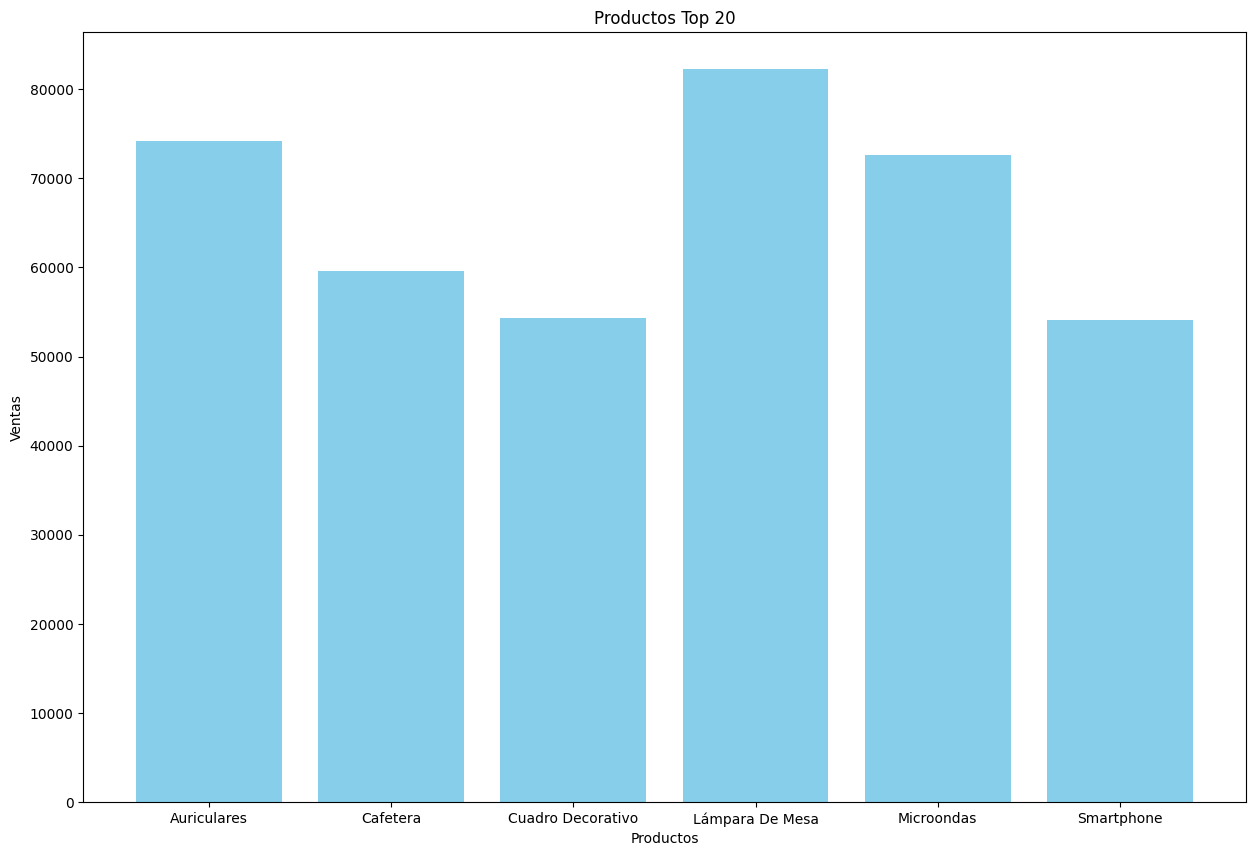

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame(productos_top_20)

plt.figure(figsize=(15, 10))
plt.bar(df['producto'], df['ingreso_total'], color='skyblue')
plt.title('Productos Top 20')
plt.xlabel('Productos')
plt.ylabel('Ventas')
plt.show()

#ETAPA 2: 3. Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados.

In [35]:
print("=== ANÁLISIS DE CATEGORÍAS CON MAYORES VENTAS ===")
ventas_por_categoria = ventas_perf.copy()

resumen_categoria = ventas_por_categoria.groupby('categoria').agg(
    ingreso_total=('ingreso', 'sum'),
    productos=('producto', 'count'),
    unidades=('cantidad', 'sum'),
    ventas=('ingreso', 'size'),
    precio_promedio_cat=('precio', 'mean')
).reset_index()


resumen_categoria = resumen_categoria.sort_values('ingreso_total', ascending=False)


resumen_categoria = resumen_categoria.reset_index(drop=True)
resumen_categoria['precio_promedio_cat'] = resumen_categoria['precio_promedio_cat'].round(2)

print("\n Ranking de categorías por ingreso total:")
print(resumen_categoria.head(20))

=== ANÁLISIS DE CATEGORÍAS CON MAYORES VENTAS ===

 Ranking de categorías por ingreso total:
           categoria  ingreso_total  productos  unidades  ventas  \
0  Electrodomésticos      505299.63       1000      6592    1000   
1        Electrónica       482577.8        999      6413     999   
2         Decoración      479216.09       1001      6490    1001   

   precio_promedio_cat  
0                76.52  
1                75.25  
2                74.10  


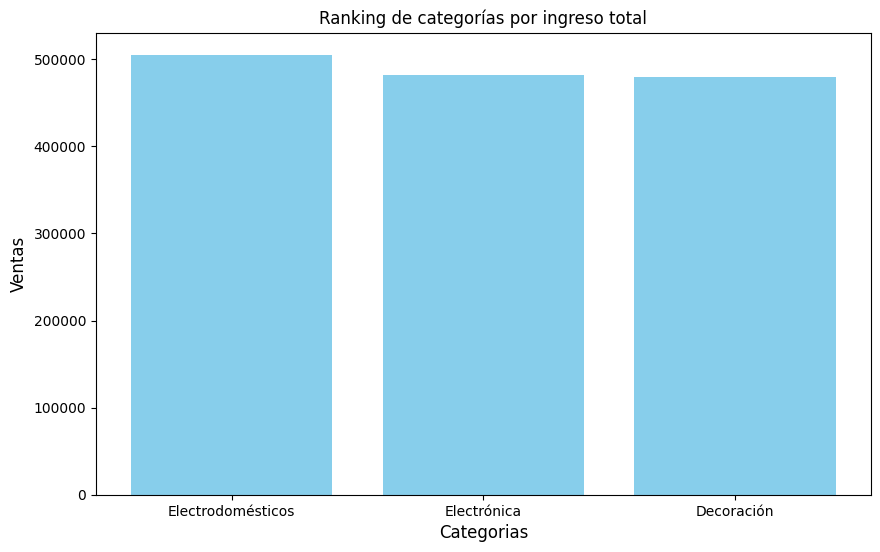

In [36]:

df=pd.DataFrame(resumen_categoria)

plt.figure(figsize=(10, 6))
plt.bar(df['categoria'], df['ingreso_total'], color='skyblue')
plt.title('Ranking de categorías por ingreso total')
plt.xlabel('Categorias',fontsize=12)
plt.ylabel('Ventas',fontsize=12)
plt.show()

#ETAPA 2: 4. Integración de Datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [37]:
#agrupo el df de ventas clean por producto y sum la cantidad por el precio
df_ventas_x_producto = ventas_clean.groupby('producto').agg(
    precio_por_cantidad=('precio', lambda x: (x * ventas_clean.loc[x.index, 'cantidad']).sum())
)

# Ordeno por producto por la cantidad de ventas
df_ventas_x_producto = df_ventas_x_producto.sort_values(by='precio_por_cantidad', ascending=False)

# muestro resultado
display(df_ventas_x_producto)

,precio_por_cantidad
producto,
Lámpara De Mesa,82276.38
Auriculares,74175.58
Microondas,72562.89
Cafetera,59607.31
Cuadro Decorativo,54297.60
Smartphone,54132.44
Secadora,52115.45
Jarrón Decorativo,51130.88
Batidora,50979.20


In [38]:
df_mkt_filtrado = marketing_clean.query("producto == 'Lámpara De Mesa'")
print(df_mkt_filtrado)
df_ventas_clean_filtrado = ventas_clean.query("producto == 'Lámpara De Mesa'")
print(df_ventas_clean_filtrado)

    id_campanha         producto  canal  costo fecha_inicio  fecha_fin
2            32  Lámpara De Mesa  Email   5.54   2024-03-28 2024-04-20
21            2  Lámpara De Mesa   RRSS   5.88   2024-05-30 2024-06-29
55           62  Lámpara De Mesa     TV   4.51   2024-08-26 2024-10-07
      id_venta         producto  precio  cantidad fecha_venta   categoria
1          811  Lámpara De Mesa  105.10         5  2024-01-02  Decoración
62         871  Lámpara De Mesa   79.64        11  2024-01-09  Decoración
94         501  Lámpara De Mesa   35.20         6  2024-01-13  Decoración
96         669  Lámpara De Mesa   96.79         5  2024-01-13  Decoración
110        169  Lámpara De Mesa   76.32         9  2024-01-15  Decoración
...        ...              ...     ...       ...         ...         ...
2971       301  Lámpara De Mesa   62.77         6  2024-12-23  Decoración
2973       559  Lámpara De Mesa   40.35         2  2024-12-23  Decoración
3016       231  Lámpara De Mesa   36.84         9 

In [39]:

# Agrupo por producto y sumo los costos
gasto_por_producto = marketing_clean.groupby('producto').agg(
    costo_total=('costo', 'sum'),
    cantidad_campanias=('id_campanha', 'count')
).reset_index()

# Ordeno por costo total (de mayor a menor)
gasto_por_producto = gasto_por_producto.sort_values('costo_total', ascending=False)
gasto_por_producto = gasto_por_producto.reset_index(drop=True)
gasto_por_producto['costo_total'] = gasto_por_producto['costo_total'].round(2)

print("=== ANÁLISIS DE GASTO EN MARKETING POR PRODUCTO ===")
print(f"\nTotal de productos únicos: {gasto_por_producto.shape[0]}")
print(f"\nRanking de productos por inversión en marketing (costo total):")
print(gasto_por_producto.head(20))


print(f"\n=== ESTADÍSTICAS GENERALES ===")
print(f"Total invertido en marketing: ${gasto_por_producto['costo_total'].sum():.2f}")
print(f"Costo promedio por campaña: ${marketing_clean['costo'].mean():.2f}")
print(f"Costo promedio por producto: ${gasto_por_producto['costo_total'].mean():.2f}")
print(f"Producto con mayor inversión: {gasto_por_producto.iloc[0]['producto']} (${gasto_por_producto.iloc[0]['costo_total']:.2f})")

=== ANÁLISIS DE GASTO EN MARKETING POR PRODUCTO ===

Total de productos únicos: 30

Ranking de productos por inversión en marketing (costo total):
                 producto  costo_total  cantidad_campanias
0                Cafetera        18.16                   3
1                Alfombra        17.46                   3
2                Cortinas        17.36                   3
3   Elementos De Cerámica        16.87                   3
4              Aspiradora        16.46                   3
5       Rincón De Plantas        16.45                   3
6          Cámara Digital        16.40                   3
7         Lámpara De Mesa        15.93                   3
8       Cuadro Decorativo        15.85                   3
9              Smartphone        15.80                   3
10               Batidora        15.28                   3
11            Auriculares        15.24                   3
12                 Laptop        15.19                   3
13      Espejo Decorativo  

In [40]:
# Análisis por canal de marketing
gasto_por_canal = marketing_clean.groupby('canal').agg(
    costo_total=('costo', 'sum'),
    cantidad_campanias=('id_campanha', 'count'),
    costo_promedio=('costo', 'mean')
).reset_index().round(2)

print("\n=== GASTO POR CANAL DE MARKETING ===")
print(gasto_por_canal)

# Productos con campañas en múltiples canales
productos_multicanal = marketing_clean.groupby('producto')['canal'].nunique()
productos_con_multicanal = productos_multicanal[productos_multicanal > 1].sort_values(ascending=False)

print(f"\nProductos con campañas en múltiples canales: {len(productos_con_multicanal)}")
print(productos_con_multicanal.head(5))


=== GASTO POR CANAL DE MARKETING ===
   canal  costo_total  cantidad_campanias  costo_promedio
0  Email       145.20                  30            4.84
1   RRSS       150.91                  30            5.03
2     TV       147.47                  30            4.92

Productos con campañas en múltiples canales: 30
producto
Adorno De Pared    3
Alfombra           3
Aspiradora         3
Auriculares        3
Batidora           3
Name: canal, dtype: int64


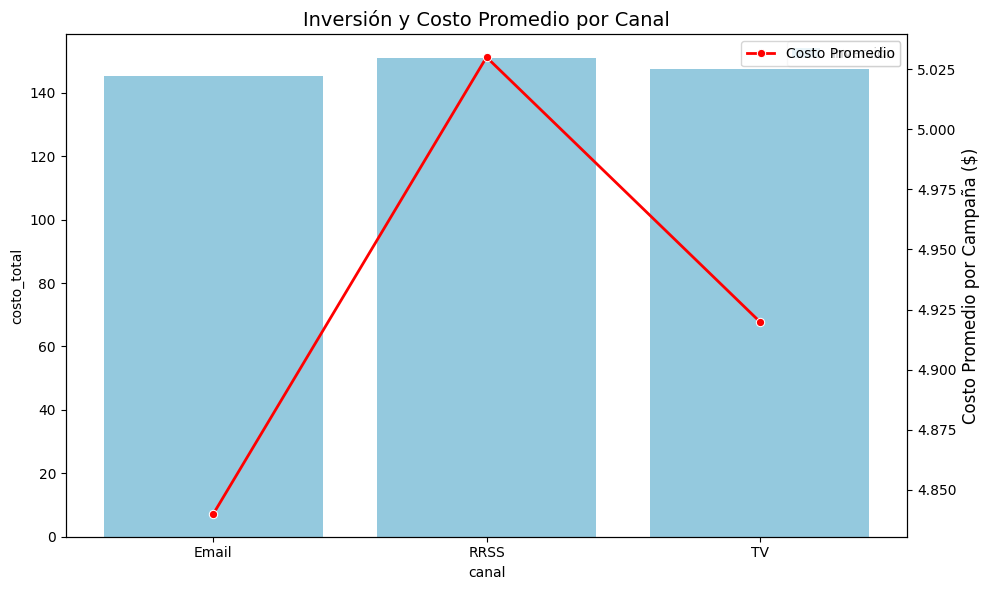

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=gasto_por_canal, x='canal', y='costo_total', color='skyblue', label='Inversión')
ax2 = plt.twinx()
sns.lineplot(data=gasto_por_canal, x='canal', y='costo_promedio', color='red',
             marker='o', linewidth=2, ax=ax2, label='Costo Promedio')
plt.title('Inversión y Costo Promedio por Canal', fontsize=14)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('Inversión Total ($)', fontsize=12)
ax2.set_ylabel('Costo Promedio por Campaña ($)', fontsize=12)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [43]:
#mergeo el df agrupado por producto con el de marketing agrupado por producto por producto
merged_df = pd.merge(df_ventas_x_producto, gasto_por_producto, on='producto')
display(merged_df)

,producto,precio_por_cantidad,costo_total,cantidad_campanias
0,Lámpara De Mesa,82276.38,15.93,3
1,Auriculares,74175.58,15.24,3
2,Microondas,72562.89,14.19,3
3,Cafetera,59607.31,18.16,3
4,Cuadro Decorativo,54297.60,15.85,3
5,Smartphone,54132.44,15.80,3
6,Secadora,52115.45,14.59,3
7,Jarrón Decorativo,51130.88,13.27,3
8,Batidora,50979.20,15.28,3
9,Rincón De Plantas,50456.45,16.45,3


In [44]:
#obtengo que % me representa el costo sobre el ingreso
merged_df['porcentaje_costo_sobre_ingreso'] = ((merged_df['costo_total'] / merged_df['precio_por_cantidad']) * 100).round(3)
display(merged_df)

,producto,precio_por_cantidad,costo_total,cantidad_campanias,porcentaje_costo_sobre_ingreso
0,Lámpara De Mesa,82276.38,15.93,3,0.019
1,Auriculares,74175.58,15.24,3,0.021
2,Microondas,72562.89,14.19,3,0.020
3,Cafetera,59607.31,18.16,3,0.030
4,Cuadro Decorativo,54297.60,15.85,3,0.029
5,Smartphone,54132.44,15.80,3,0.029
6,Secadora,52115.45,14.59,3,0.028
7,Jarrón Decorativo,51130.88,13.27,3,0.026
8,Batidora,50979.20,15.28,3,0.030
9,Rincón De Plantas,50456.45,16.45,3,0.033


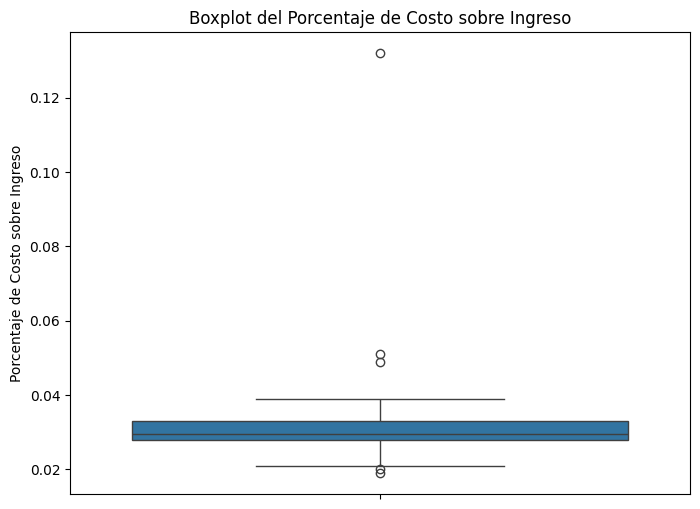

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to identify dispersion and potential outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_df['porcentaje_costo_sobre_ingreso'])
plt.title('Boxplot del Porcentaje de Costo sobre Ingreso')
plt.ylabel('Porcentaje de Costo sobre Ingreso')
plt.show()

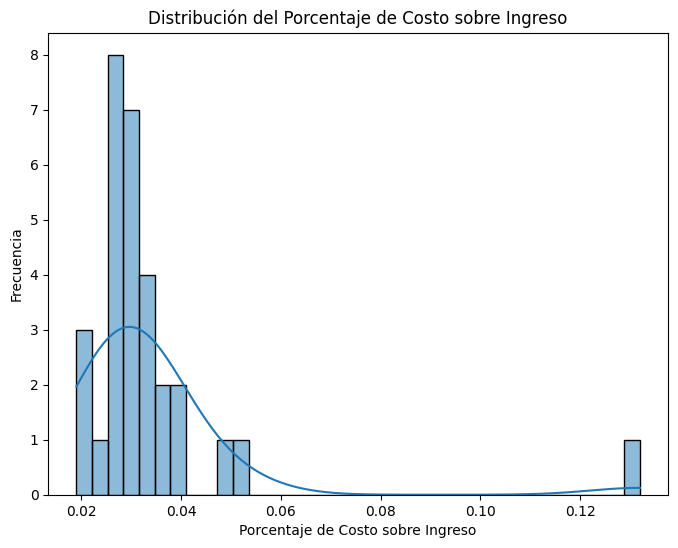

In [46]:
# Histogram to see the distribution
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['porcentaje_costo_sobre_ingreso'], kde=True)
plt.title('Distribución del Porcentaje de Costo sobre Ingreso')
plt.xlabel('Porcentaje de Costo sobre Ingreso')
plt.ylabel('Frecuencia')
plt.show()

#ETAPA 3: 1. Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.

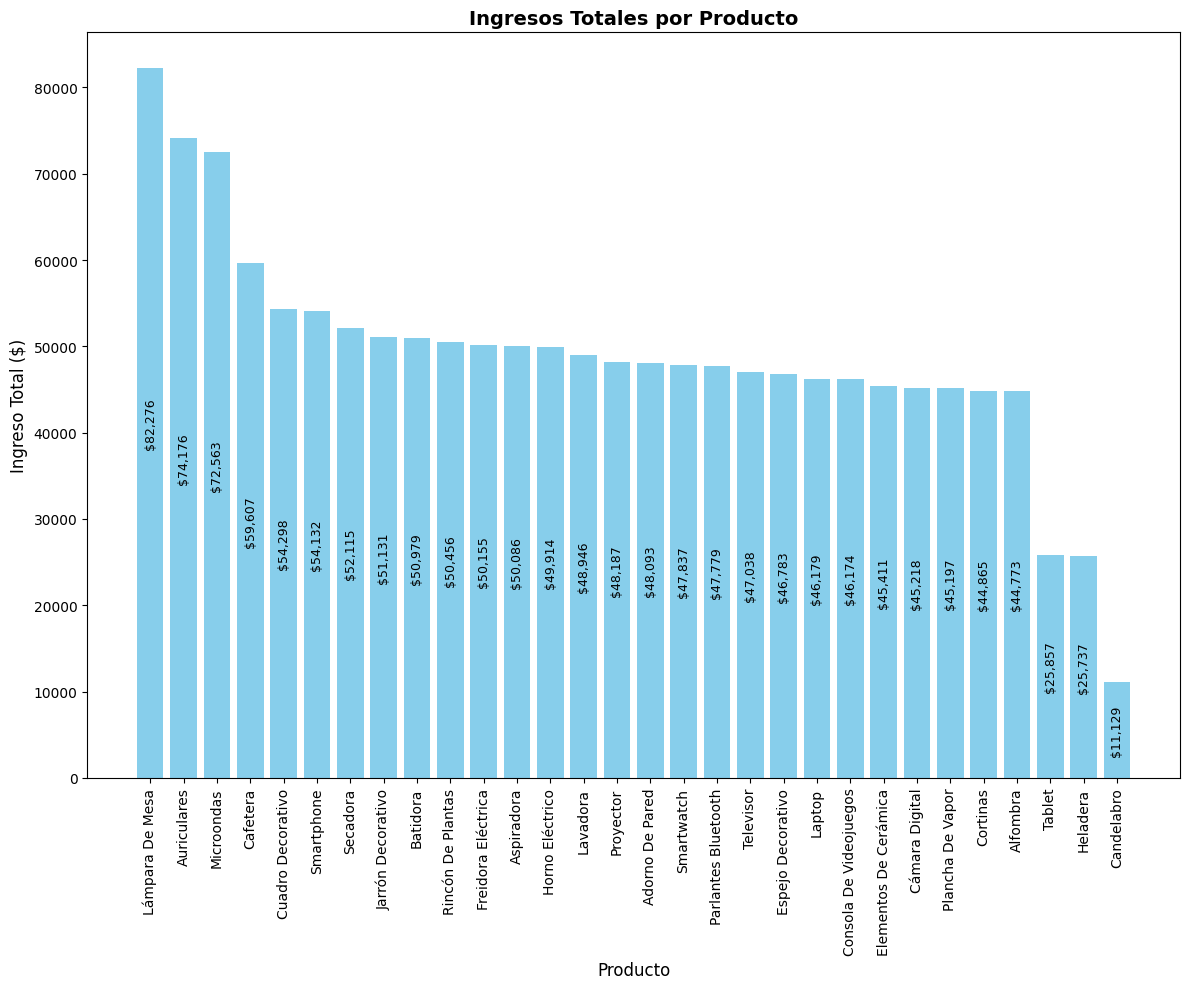

In [47]:
df = resumen_prod.copy()

import matplotlib.pyplot as plt

df_ordenado = df.sort_values("ingreso_total", ascending=False)

plt.figure(figsize=(12, 10))
color_celeste = "skyblue"
barras = plt.bar(df_ordenado["producto"], df_ordenado["ingreso_total"], color=color_celeste)
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")
plt.xlabel("Producto", fontsize=12)
plt.ylabel("Ingreso Total ($)", fontsize=12)
plt.xticks(rotation=90)


for barra in barras:

    y = barra.get_height()


    plt.text(
        barra.get_x() + barra.get_width() / 2,
        y / 2,
        f"${y:,.0f}",
        ha='center',
        va='center',
        fontsize=9,
        color="black",
        rotation=90
    )

plt.tight_layout()
plt.show()

Medidas de tendencia central del Subtotal Estas medidas describen el valor típico de las ventas:

Media: promedio general. Mediana: valor central de los datos ordenados. Moda: valor que más se repite.

In [53]:
Df= resumen_categoria.copy()
media = Df['ingreso_total'].mean()
mediana = Df['ingreso_total'].median()
moda = Df['ingreso_total'].mode()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:")
print(moda)

Media: 489031.17333333334
Mediana: 482577.8
Moda:
0    479216.09
1     482577.8
2    505299.63
Name: ingreso_total, dtype: Float64


In [55]:
rango = Df['ingreso_total'].max() - Df['ingreso_total'].min()
varianza = Df['ingreso_total'].var(ddof=1)
desviacion = Df['ingreso_total'].std(ddof=1)

print("Rango:", rango)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion)

Rango: 26083.53999999998
Varianza: 201322285.26743323
Desviación estándar: 14188.808451291223


In [56]:
print(f"Media de Ingreso Total: {media:,.2f}")
print(f"Mediana de Ingreso Total: {mediana:,.2f}")
print(f"Desviación Estándar de Ingreso Total: {desviacion:,.2f}")
print(f"Rango de Ingreso Total: {rango:,.2f}")

Media de Ingreso Total: 489,031.17
Mediana de Ingreso Total: 482,577.80
Desviación Estándar de Ingreso Total: 14,188.81
Rango de Ingreso Total: 26,083.54


**Valores Obtenidos:**

**Media (Promedio):** 48,903.12

**Mediana:** 48,2577.8

**Desviación Estándar:** 14,188.81

**Rango:** 71,147.58 (Máximo 82,276.38 - Mínimo 11,128.80)

**Analisis**

**Relación Media-Mediana: Distribución simétrica**

La diferencia es solo del 1.3%, lo que indica una distribución prácticamente simétrica. No hay sesgo significativo hacia valores altos o bajos.

**Dispersión de los datos: Variabilidad moderada-alta**

Un CV del 29% indica variabilidad moderada-alta. Esto significa que los ingresos de ventas tienen una dispersión considerable alrededor de la media.

**Amplitud de los datos: Gran rango relativo**

El rango es 1.45 veces el valor promedio, lo que sugiere una gran dispersión entre los valores mínimo y máximo.

**Conclusion:**

Los datos presentan una estabilidad, con un ingreso promedio mensual de aproximadamente 48,900 que se mantiene a lo largo del tiempo. Esta estabilidad se refleja en la simetria de la distribución, donde  la diferencia entre la media y la mediana es de 645.
Sin embargo La desviación estándar de 14,189, que representa el 29% del promedio, indica fluctuaciones considerables mes a mes. Esta variabilidad se manifiesta en un rango alarmante de 71,148 entre el mejor y peor desempeño, donde el mes más productivo genera 7.4 veces más ingresos que el menos productivo. El mínimo de 11,128 representa apenas el 23% del ingreso promedio, sugiriendo vulnerabilidades operativas que podrían comprometer la sostenibilidad en períodos adversos.
No obstante, los extremos de la distribución, especialmente el valor máximo de $82,276 señalan la presencia de factores atípicos.

###Detección de outliers usando el IQR

In [58]:
q1 = Df['ingreso_total'].quantile(0.25)
q2 = Df['ingreso_total'].quantile(0.5)
q3 = Df['ingreso_total'].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Mediana (Q2):", q2)
print("Q3:", q3)
print("IQR:", iqr)

Q1: 480896.945
Mediana (Q2): 482577.8
Q3: 493938.71499999997
IQR: 13041.76999999996


In [60]:
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = Df[(Df['ingreso_total'] < lim_inf) | (Df['ingreso_total'] > lim_sup)]

print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)
print("\nOutliers detectados:")
print(outliers)

Límite inferior: 461334.29000000004
Límite superior: 513501.3699999999

Outliers detectados:
Empty DataFrame
Columns: [categoria, ingreso_total, productos, unidades, ventas, precio_promedio_cat]
Index: []


##ETAPA 3: 2. Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.

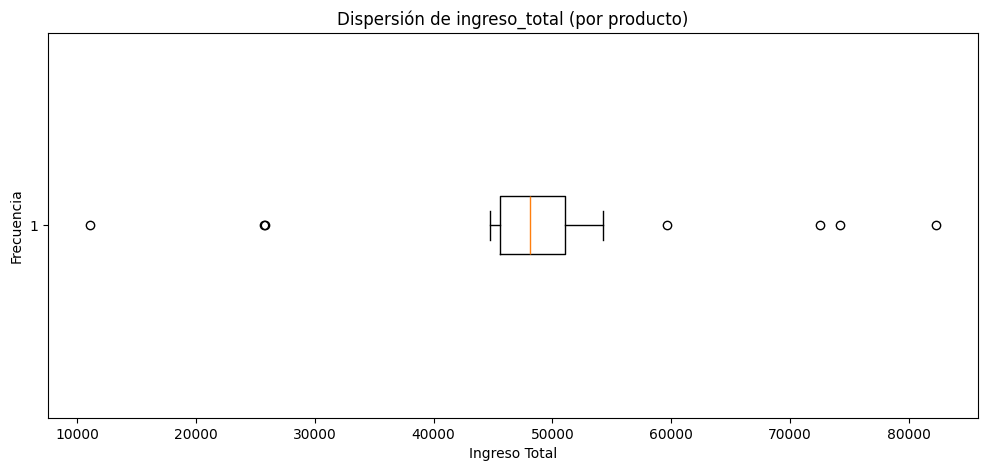

In [63]:
#Dispersión de ingreso_total (por producto)
import matplotlib.pyplot as plt

vals = resumen_prod['ingreso_total'].dropna()

plt.figure(figsize=(12, 5))
plt.boxplot(vals, vert=False)
plt.title('Dispersión de ingreso_total (por producto)')
plt.xlabel('Ingreso Total')
plt.ylabel('Frecuencia')
plt.show()

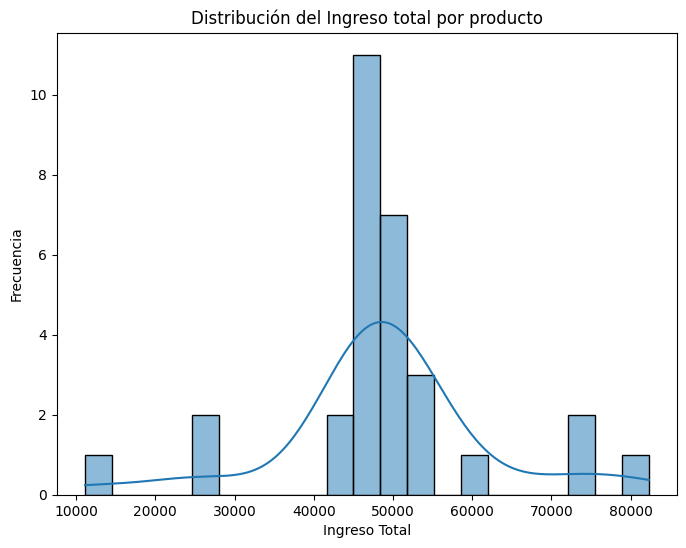

In [62]:
# Histograma para ver la distribusion
plt.figure(figsize=(8, 6))
sns.histplot(vals, kde=True)
plt.title('Distribución del Ingreso total por producto')
plt.xlabel('Ingreso Total')
plt.ylabel('Frecuencia')
plt.show()

##Etapa 3: 3 Correlación

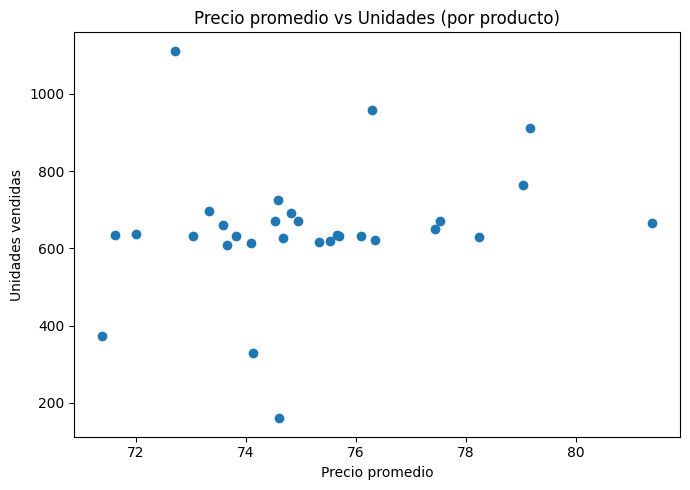

In [64]:
#Precio_promedio vs unidades (por producto)
import matplotlib.pyplot as plt

x = resumen_prod['precio_promedio']
y = resumen_prod['unidades']

plt.figure(figsize=(7, 5))
plt.scatter(x, y)
plt.title('Precio promedio vs Unidades (por producto)')
plt.xlabel('Precio promedio')
plt.ylabel('Unidades vendidas')
plt.tight_layout()
plt.show()

### 4.1 Visualización con Matplotlib

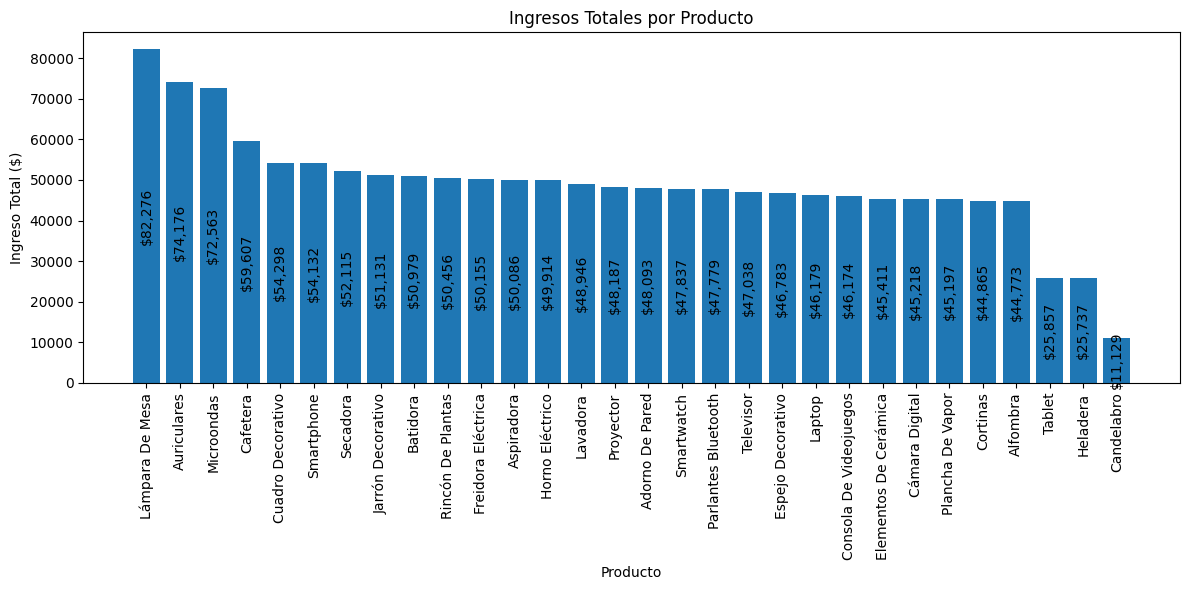

In [68]:
# Barras: Ingresos por producto

import matplotlib.pyplot as plt

df = resumen_prod.copy()
df_ordenado = df.sort_values('ingreso_total', ascending=False)

plt.figure(figsize=(12, 6))
barras = plt.bar(df_ordenado['producto'], df_ordenado['ingreso_total'])

plt.title('Ingresos Totales por Producto')
plt.xlabel('Producto')
plt.ylabel('Ingreso Total ($)')
plt.xticks(rotation=90)


for b in barras:
    h = b.get_height()
    x_c = b.get_x() + b.get_width()/2
    plt.text(x_c, h/2, f"${h:,.0f}", ha='center', va='center', rotation=90)

plt.tight_layout()
plt.show()


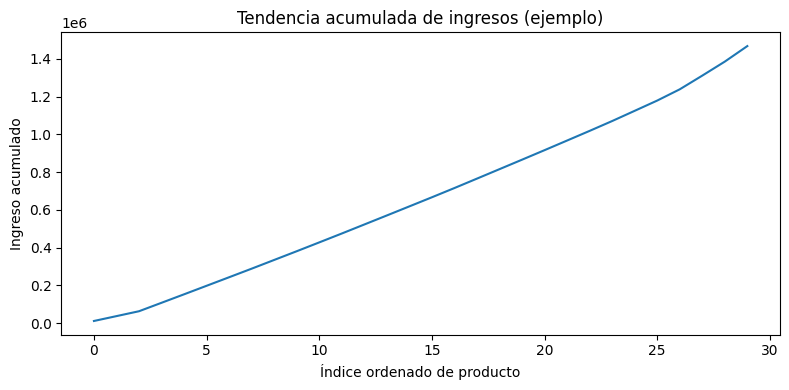

In [67]:
# Líneas: ejemplo simple de tendencia acumulada

import matplotlib.pyplot as plt
import numpy as np

valores = resumen_prod['ingreso_total'].sort_values().values
acum = np.cumsum(valores)

plt.figure(figsize=(8, 4))
plt.plot(acum)
plt.title('Tendencia acumulada de ingresos (ejemplo)')
plt.xlabel('Índice ordenado de producto')
plt.ylabel('Ingreso acumulado')
plt.tight_layout()
plt.show()

In [69]:
# Agrupamos las ventas por fecha y sumamos los ingresos de cada día
ventas_perf['fecha_venta'] = pd.to_datetime(ventas_perf['fecha_venta'], errors='coerce')
ingresos_por_dia = ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()
print(ingresos_por_dia.head(160))

fecha_venta
2024-01-02    3751.26
2024-01-03    3601.84
2024-01-04    5241.78
2024-01-05    4758.53
2024-01-06     2899.6
               ...   
2024-06-05    3357.26
2024-06-06    4107.55
2024-06-07    2389.56
2024-06-08    6433.07
2024-06-09    2260.46
Name: ingreso, Length: 160, dtype: Float64


In [70]:
ingresos_acumulados = ingresos_por_dia.cumsum()
print(ingresos_acumulados)

fecha_venta
2024-01-02       3751.26
2024-01-03        7353.1
2024-01-04      12594.88
2024-01-05      17353.41
2024-01-06      20253.01
                 ...    
2024-12-26    1451156.47
2024-12-27    1453820.73
2024-12-28    1457006.58
2024-12-29    1461227.29
2024-12-30    1467093.52
Name: ingreso, Length: 364, dtype: Float64


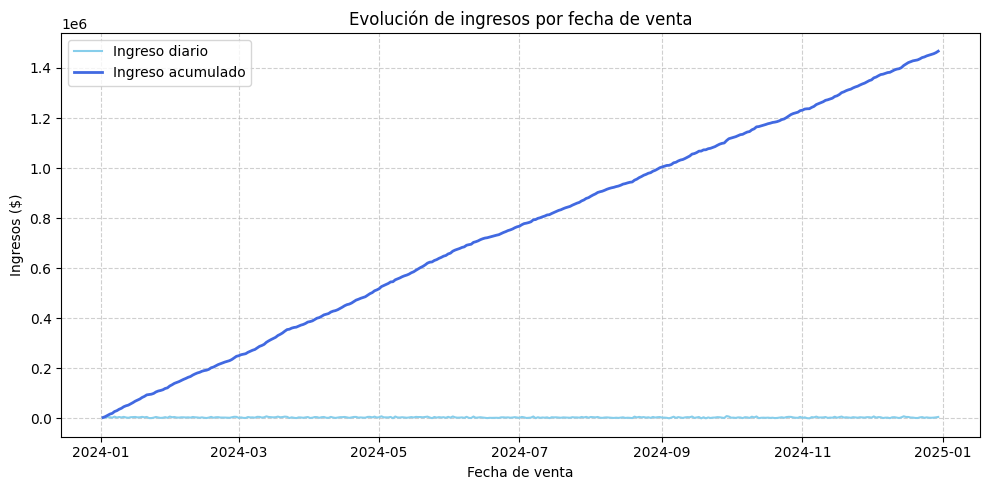

In [72]:

# Tendencia real de ingresos a lo largo del tiempo

import matplotlib.pyplot as plt
import pandas as pd


ventas_perf['fecha_venta'] = pd.to_datetime(ventas_perf['fecha_venta'], errors='coerce')

ingresos_por_dia = ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()

ingresos_acumulados = ingresos_por_dia.cumsum()

plt.figure(figsize=(10,5))
plt.plot(ingresos_por_dia, color='skyblue', label='Ingreso diario')
plt.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)
plt.title('Evolución de ingresos por fecha de venta')
plt.xlabel('Fecha de venta')
plt.ylabel('Ingresos ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

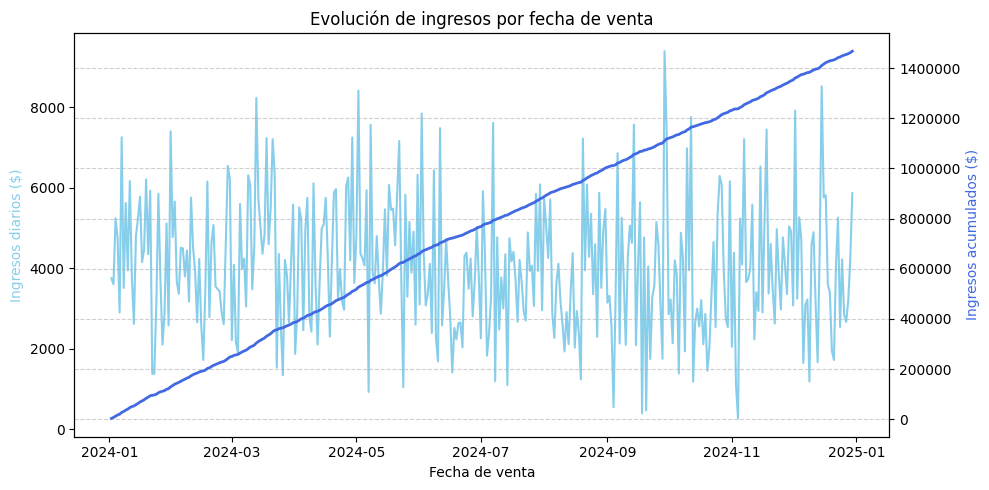

In [73]:
# Tendencia real de ingresos a lo largo del tiempo
import matplotlib.pyplot as plt
import pandas as pd
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(ingresos_por_dia, color='skyblue', label='Ingreso diario')
ax1.set_xlabel('Fecha de venta')
ax1.set_ylabel('Ingresos diarios ($)', color='skyblue')
ax1.ticklabel_format(style='plain', axis= 'y')


ax2 = ax1.twinx()
ax2.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)
ax2.set_ylabel('Ingresos acumulados ($)', color='royalblue')
ax2.ticklabel_format(style='plain', axis= 'y')

plt.title('Evolución de ingresos por fecha de venta')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 4.2 Visualización Avanzada con Seaborn

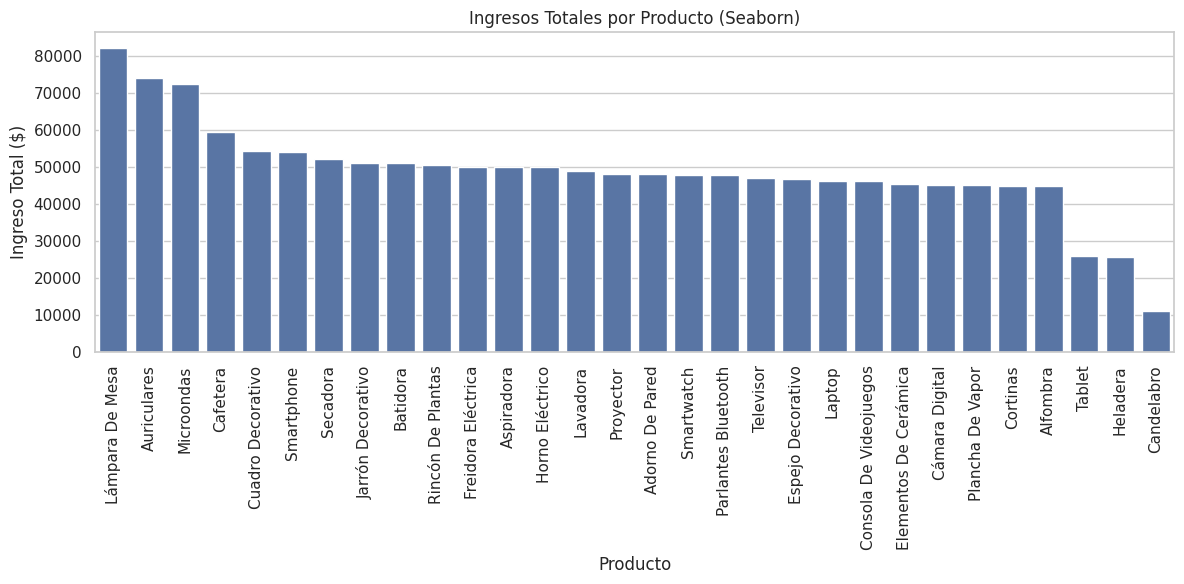

In [75]:
# Seaborn: barras ordenadas y boxplot por categoría

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")


df = resumen_prod.sort_values('ingreso_total', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x='producto', y='ingreso_total')
ax.set_title('Ingresos Totales por Producto (Seaborn)')
ax.set_xlabel('Producto'); ax.set_ylabel('Ingreso Total ($)')
plt.xticks(rotation=90)
plt.tight_layout(); plt.show()

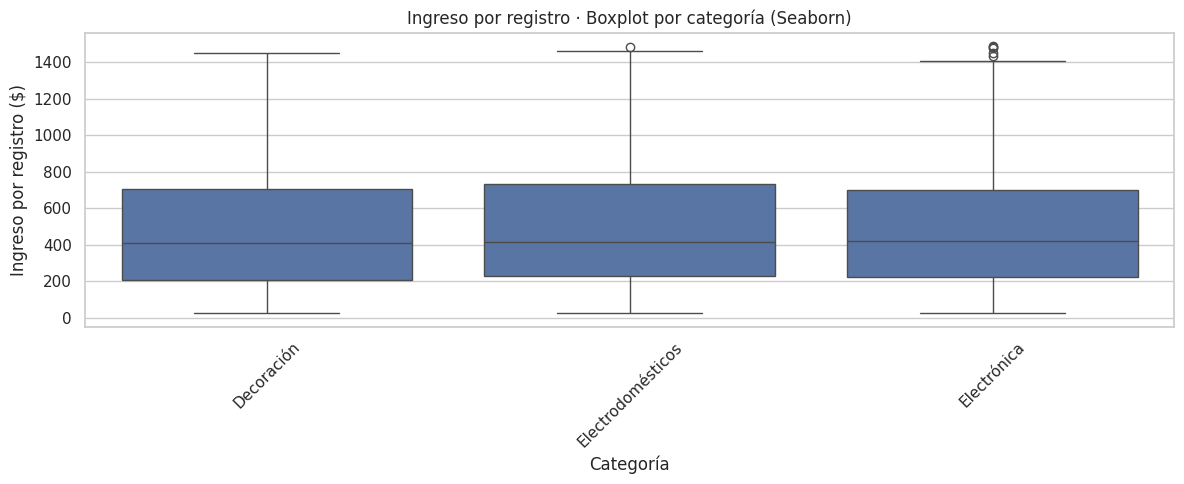

In [76]:
# Boxplot por categoría (ingreso por registro)
plt.figure(figsize=(12, 5))
ax = sns.boxplot(data=ventas_perf, x='categoria', y='ingreso')
ax.set_title('Ingreso por registro · Boxplot por categoría (Seaborn)')
ax.set_xlabel('Categoría'); ax.set_ylabel('Ingreso por registro ($)')
plt.xticks(rotation=45)
plt.tight_layout(); plt.show()

### 4.3 Presentación Final

####ETAPA 1 y 2: Preparación, limpieza e integración de datos

La primera fase del proyecto de análisis de datos, comprendida por las Etapas 1 y 2, constituyó un proceso. La limpieza comenzó con un diagnóstico preciso de la calidad inicial, donde se identificaron problemáticas específicas para cada dataset: en el caso de ventas, se detectaron 2 valores nulos y 35 registros duplicados que representaban aproximadamente el 1.15% del total, además de inconsistencias en tipos de datos como la columna de precio en formato texto con símbolos monetarios; en contraste, los datasets de clientes y marketing presentaron una calidad inicial superior, sin valores nulos ni duplicados, aunque igualmente requerían ajustes en el manejo de fechas.

**La transformación de lo datos incluyó:**

-Convertir precios a números para poder calcular con ellos

-Estandarizar fechas para analizar tendencias temporales

-Unificar nombres de productos (eliminando inconsistencias como mayúsculas o acentos variables)

-Crear una nueva métrica clave: ingreso_total = precio × cantidad, que se convierte en nuestra medida central de desempeño

La integración entre los datasets de ventas y marketing mediante el merge permitio que a traves de  métricas comerciales concretas con información de campañas publicitarias obtener una mejor visión del negocio.

####ETAPA 3: Estadística descriptiva y análisis exploratorio (EDA)

Los números clave nos dicen que:

-Nuestro ingreso promedio está en 48.903

-El punto medio de todos nuestros ingresos es 48.257

-La diferencia entre estos dos valores es mínima (solo 6.453 que representa apenas el 1.3% del promedio)

Cuando el promedio y el punto medio son casi iguales, significa que nuestros ingresos se comportan de manera predecible y equilibrada. No tenemos meses extremadamente bajos que arrastren el promedio hacia abajo, ni meses anormalmente altos que lo inflen artificialmente.

Nuestra variabilidad es baja y controlada:

-La mayoría de nuestros ingresos (alrededor de dos tercios) caen en un rango estrecho entre 47.484 y 50.322

-Esto representa solo una fluctuación del 2.9% alrededor de nuestro promedio, lo cual es excelente para un negocio de nuestro tamaño

-La mitad central de nuestros ingresos varía en menos de 13,042, mostrando consistencia mes a mes

Esto significa que podemos planificar con confianza ya que los ingresos serán cercanos a los 48900. Que ademas
tenemos poca sorpresa financiera y las fluctuaciones son pequeñas y predecibles



#### 🔍 EDA (Análisis Exploratorio de Datos)

**Interpretación de gráficos y correlaciones**


Los gráficos nos permitieron ver claramente cómo se distribuyen los ingresos de nuestros productos:

-El histograma mostró que la mayoría de nuestros productos generan ingresos entre los $40,000 y $55,000 pesos mensuales

-Unos pocos productos destacan significativamente, llegando a generar más de $80,000 pesos

-Esta "cola hacia la derecha" en la distribución nos indica que tenemos productos estrella que superan ampliamente el rendimiento promedio

**Productos destacados**

El boxplot (gráfico de caja) identificó claramente cuáles son nuestros productos de mayor éxito:

-Lámpara de Mesa

-Auriculares

-Microondas

-Cafetera

Estos productos no son errores en los datos, sino casos reales de éxito comercial que debemos estudiar y replicar.

**Relación precio vs cantidad vendida**

Analizamos si el precio afecta la cantidad que vendemos y encontramos que:

-Existe una relación positiva pero débil (correlación de +0.28)

-Cuando el precio aumenta, la cantidad vendida tiende a aumentar ligeramente

-Esto nos indica que los productos de precio medio/alto mantienen buena demanda

Esto significa que:

-Los clientes valoran calidad y funcionalidad por encima del precio más bajo

-Productos como lámpara de mesa y microondas son percibidos como de buen valor

-No estamos en un mercado donde el precio sea el factor decisivo

-Podemos enfocarnos en el valor del producto más que en competir solo por precio

**Conclusión**

Tenemos dos grupos claros de productos: la mayoría que se desempeñan consistentemente y algunos productos estrella que generan ingresos excepcionales. Además, el precio no desalienta las ventas, lo que nos permite mantener márgenes saludables mientras ofrecemos productos de calidad que los clientes valoran.



####ETAPA 4: Visualización y comunicación de resultados

Los gráficos nos permitieron transformar números en información clara y visual que cualquiera puede entender rápidamente:

**Los productos que más ingresos generan**

**1. Nuestros Top 3 de ventas:**

-Lámpara de mesa: Genera aproximadamente $82,000 en ingresos

-Auriculares: Genera aproximadamente $74,000 en ingresos

-Microondas: Genera aproximadamente $72,500 en ingresos

Esto nos muestra claramente que los productos tecnológicos y de uso diario en el hogar son los que dominan nuestras ventas.

**Análisis por categorías**

**2. Las categorías más rentables:**

-Electrodomésticos

-Decoración

Estas dos categorías no solo generan los mayores ingresos promedio, sino que también muestran la mayor variabilidad - algunos productos dentro de ellas son extremadamente exitosos mientras otros tienen rendimiento moderado.

**Hallazgos clave visualizados**

**3. Lo que realmente muestran los gráficos:**

-Los productos más vendidos no son necesariamente los más caros

-Existe un equilibrio inteligente entre precio y volumen que debemos mantener

-La distribución de nuestros ingresos es asimétrica - unos pocos productos generan mucho más que la mayoría

**Son importantes estas visualizaciones porque convierten datos complejos en información accionable:**

 1. Clarifican prioridades: Sabemos exactamente en qué productos enfocarnos

 2.Revelan patrones: Vemos tendencias que los números solos no muestran

 3. Facilitan la comunicación: Cualquier miembro del equipo puede entender estos gráficos

 4. Apoyan decisiones: Podemos tomar mejores decisiones basadas en evidencia visual

**En resumen:** Los gráficos no solo confirman lo que dicen los números, sino que nos dan una historia visual de nuestro negocio que podemos usar para mejorar continuamente.



####Conclusiones finales


**1. Estabilidad financiera demostrada:**
Nuestros ingresos mensuales muestran una consistencia , con un promedio de 48,903 que casi coincide con el punto medio de 48,257 (diferencia de solo 1.3%). Esta estabilidad nos permite planificar con precisión y reducir la incertidumbre financiera, ya que el 68% de nuestros ingresos caen en un rango estrecho de apenas 2,838 alrededor del promedio.

**2. Productos estrella identificados:**
Hemos identificado nuestros productos de mayor rendimiento: Lámpara de Mesa (82,000), Auriculares (74,000) y Microondas (72,500). Estos artículos tecnológicos y de uso diario no solo generan ingresos excepcionales, sino que representan casos de éxito replicable que debemos estudiar y potenciar.

**3. Visualizacion que transforma datos:**
Los gráficos nos han proporcionado una narrativa visual que revela patrones clave: nuestras categorías más rentables (Electrodomésticos y Decoración), la asimetría en la distribución de ingresos, y el equilibrio inteligente entre precio y volumen que debemos mantener.

**4. Implicaciones estrategicas:**

a. Enfoque en productos de alto valor más que en competencia por precio

b. Replicar el éxito de nuestros productos estrella en otras líneas

c. Mantener la estabilidad financiera como ventaja competitiva

d. Usar visualizaciones para comunicar y alinear al equipo

